In [9]:
using Revise
using BilevelTrajOpt

using RigidBodyDynamics
using Plots
gr(size=(500,500), html_output_format=:png);

In [2]:
urdf = joinpath("..", "urdf", "ball.urdf")
mechanism = parse_urdf(Float64, urdf)
body = findbody(mechanism, "ball")
basejoint = joint_to_parent(body, mechanism)
floatingjoint = Joint(basejoint.name, frame_before(basejoint), frame_after(basejoint), QuaternionFloating{Float64}())
replace_joint!(mechanism, basejoint, floatingjoint)
position_bounds(floatingjoint) .= RigidBodyDynamics.Bounds(-100, 100)
velocity_bounds(floatingjoint) .= RigidBodyDynamics.Bounds(-100, 100)
μ = 0.5
motion_type = :xyz
point = Point3D(default_frame(findbody(mechanism, "floor")), [0.,0.,0.])
normal = FreeVector3D(default_frame(findbody(mechanism, "floor")), [0.,0.,1.])
hs = HalfSpace(point, normal)
floor = Obstacle(hs, μ, motion_type)
obstacles = [floor]
env = parse_contacts(mechanism, urdf, obstacles)
x0 = MechanismState(mechanism)
Δt = 0.005;

In [34]:
q0 = [1., 0., 0., 0., 0., 0., 0.015]
v0 = [0., 0., 0., 0.5, 0., 0.]
N = 25

set_configuration!(x0, q0)
set_velocity!(x0, v0)
setdirty!(x0)

ctrl! = (u,t,x) -> u[:] .= 0.;

In [ ]:
println("Explicit Contacts")
traj_exp = BilevelTrajOpt.simulate_ipopt(x0,env,Δt,N,ctrl!,implicit_contact=false);

In [ ]:
println("Implicit Contacts")
traj_imp = BilevelTrajOpt.simulate_ipopt(x0,env,Δt,N,ctrl!,implicit_contact=true);

In [41]:
println("Explicit Contacts")
traj_exp = BilevelTrajOpt.simulate_snopt(x0,env,Δt,N,ctrl!,implicit_contact=false);

Explicit Contacts
  0.000552 seconds (1.81 k allocations: 273.813 KiB)
  0.000347 seconds (1.81 k allocations: 273.813 KiB)
  0.000343 seconds (1.81 k allocations: 273.813 KiB)
Finished successfully: optimality conditions satisfied
  0.000323 seconds (1.81 k allocations: 273.813 KiB)
  0.000334 seconds (1.81 k allocations: 273.813 KiB)
  0.000330 seconds (1.81 k allocations: 273.813 KiB)
Finished successfully: optimality conditions satisfied
  0.000350 seconds (1.81 k allocations: 273.813 KiB)
  0.000362 seconds (1.81 k allocations: 273.813 KiB)
  0.000410 seconds (1.81 k allocations: 273.813 KiB)
Finished successfully: optimality conditions satisfied
  0.000330 seconds (1.81 k allocations: 273.813 KiB)
  0.000340 seconds (1.81 k allocations: 273.813 KiB)
  0.000337 seconds (1.81 k allocations: 273.813 KiB)
Finished successfully: optimality conditions satisfied
  0.000334 seconds (1.81 k allocations: 273.813 KiB)
  0.000349 seconds (1.81 k allocations: 273.813 KiB)
  0.000348 seconds (

In [43]:
println("Implicit Contacts")
traj_imp = BilevelTrajOpt.simulate_snopt(x0,env,Δt,N,ctrl!,implicit_contact=true);

Implicit Contacts
  0.242510 seconds (1.41 M allocations: 253.519 MiB, 18.92% gc time)
  0.244340 seconds (1.41 M allocations: 253.519 MiB, 19.82% gc time)
  0.242919 seconds (1.41 M allocations: 253.509 MiB, 18.43% gc time)
  0.294563 seconds (1.41 M allocations: 253.508 MiB, 17.15% gc time)
Finished successfully: feasible point found
  0.343238 seconds (1.41 M allocations: 253.519 MiB, 14.15% gc time)
  0.251020 seconds (1.41 M allocations: 253.519 MiB, 19.49% gc time)
  0.249273 seconds (1.41 M allocations: 253.508 MiB, 19.81% gc time)
  0.241086 seconds (1.41 M allocations: 253.508 MiB, 18.44% gc time)
Finished successfully: feasible point found
  0.243960 seconds (1.41 M allocations: 253.518 MiB, 19.97% gc time)
  0.239109 seconds (1.41 M allocations: 253.518 MiB, 18.74% gc time)
  0.245104 seconds (1.41 M allocations: 253.508 MiB, 20.09% gc time)
  0.246607 seconds (1.41 M allocations: 253.508 MiB, 20.11% gc time)
Finished successfully: feasible point found
  0.240957 seconds (1.

  0.239111 seconds (1.41 M allocations: 253.509 MiB, 18.48% gc time)
  0.243143 seconds (1.41 M allocations: 253.509 MiB, 19.61% gc time)
  0.239492 seconds (1.41 M allocations: 253.509 MiB, 18.78% gc time)
  0.242678 seconds (1.41 M allocations: 253.511 MiB, 19.92% gc time)
  0.242889 seconds (1.41 M allocations: 253.511 MiB, 19.90% gc time)
  0.237579 seconds (1.41 M allocations: 253.513 MiB, 18.59% gc time)
  0.242961 seconds (1.41 M allocations: 253.511 MiB, 19.86% gc time)
  0.240821 seconds (1.41 M allocations: 253.515 MiB, 18.54% gc time)
  0.247708 seconds (1.41 M allocations: 253.513 MiB, 19.80% gc time)
  0.239169 seconds (1.41 M allocations: 253.511 MiB, 18.62% gc time)
  0.272920 seconds (1.41 M allocations: 253.525 MiB, 19.25% gc time)
  0.247361 seconds (1.41 M allocations: 253.511 MiB, 20.00% gc time)
  0.254300 seconds (1.41 M allocations: 253.511 MiB, 18.53% gc time)
  0.253804 seconds (1.41 M allocations: 253.511 MiB, 20.16% gc time)
  0.251011 seconds (1.41 M allocat

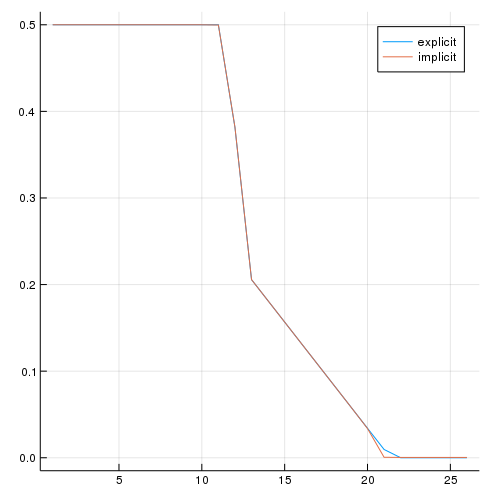

In [44]:
ts = cumsum([Δt for i in 1:N]);
j = 11
plot(traj_exp[j,:],label="explicit")
plot!(traj_imp[j,:],label="implicit")